# Neural Network for Regression 
This code blends the best of 2 tutorials: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33 and https://www.tensorflow.org/tutorials/keras/regression

In [19]:
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# pip install git+https://github.com/tensorflow/docs
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
# Libraries and options
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

# 1. Data Preprocessing
Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
# Load data
gt = pd.read_csv('train.csv')
gt.describe()

#!# If opening teh funda file bugs because of special characters:
# Open the file with sublime. Open menu Find > Replace. 
# On the bottom left of the screen, click on the button for regular expression (it's a dot and a star .* )
# Run thi sregular expression, and replace with a space 
# [^A-Za-z0-9-,;()_ "'\.\-\n\r\t]

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [18]:
# Number of rows & columns
gt.shape

(1460, 216)

### Exclude data points with missing values

In [3]:
# Exclude columns containing missing values
def get_cols_with_no_nans(df):
    cols_with_no_nans = []
    for col in df.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

cols_no_nans = get_cols_with_no_nans(gt)
gt = gt[cols_no_nans]
gt.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411  ...   
std      30.202904     20.645407   456.098091   161.319273   441.866955  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000  ...   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000  ...   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000  ...   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

### Clean data frame

<IPython.core.display.Javascript object>


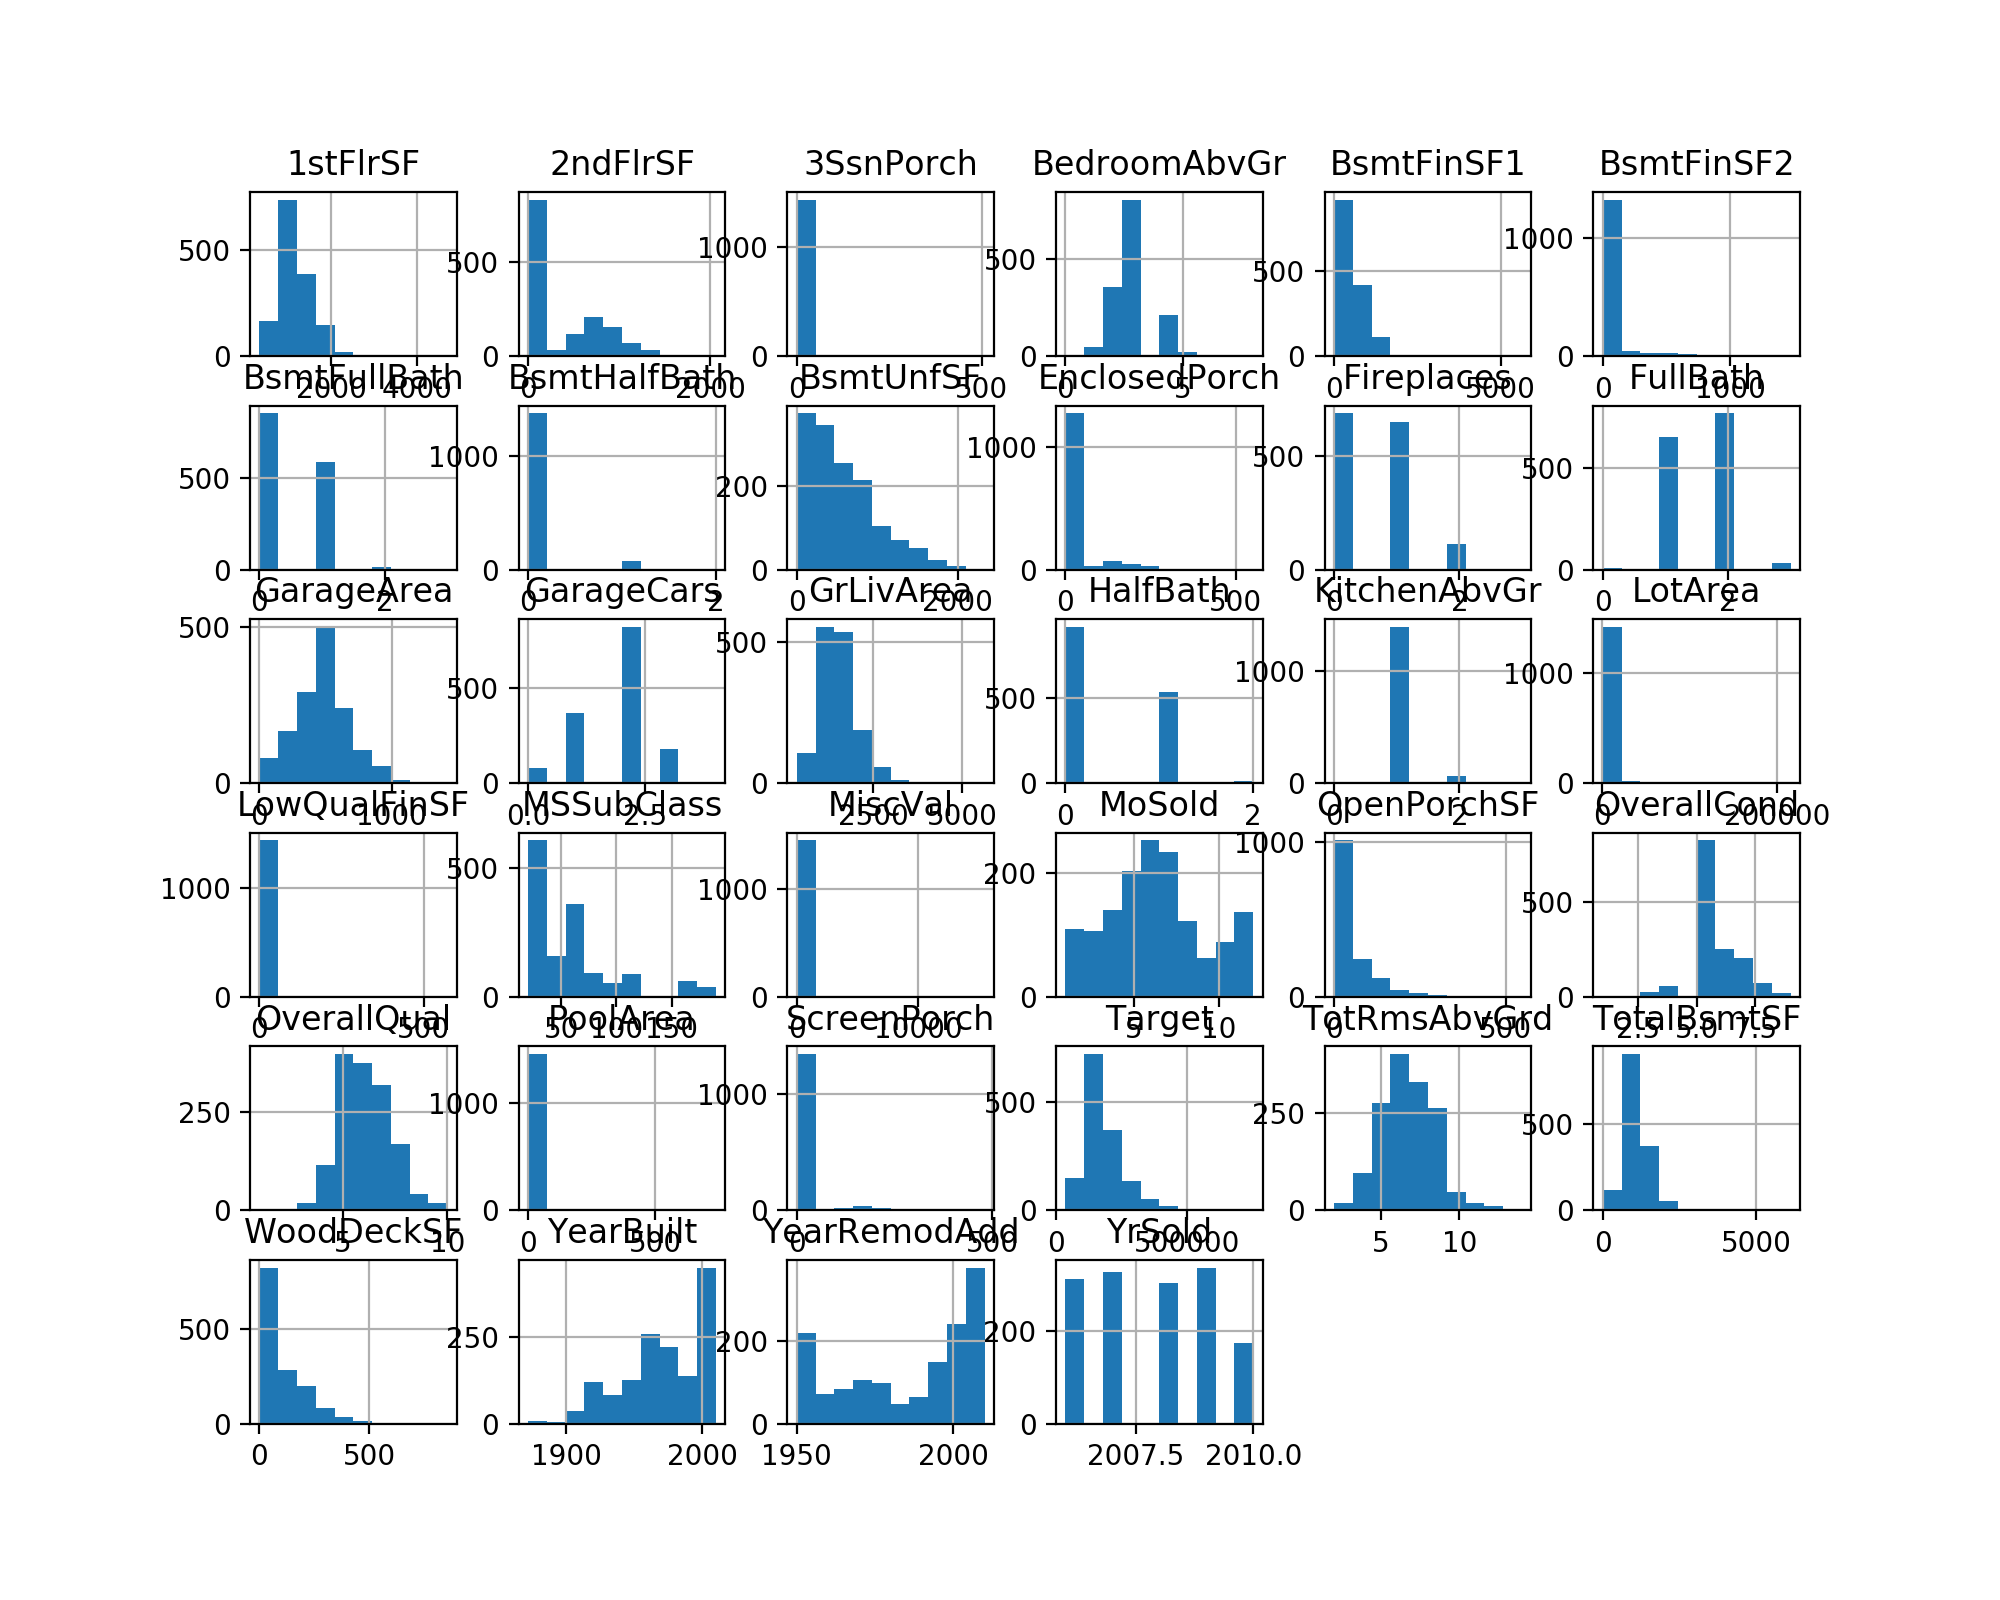

In [4]:
# Rename & extract the variable to predict
target = gt.SalePrice
gt.drop(['SalePrice'],axis = 1 , inplace = True)
gt['Target'] = target

# Drop column ID
gt.drop(['Id'],axis = 1 , inplace = True)

# Overview of feature distribution
gt.hist(figsize = (10,8))
plt.show()

### Explore correlations

<IPython.core.display.Javascript object>


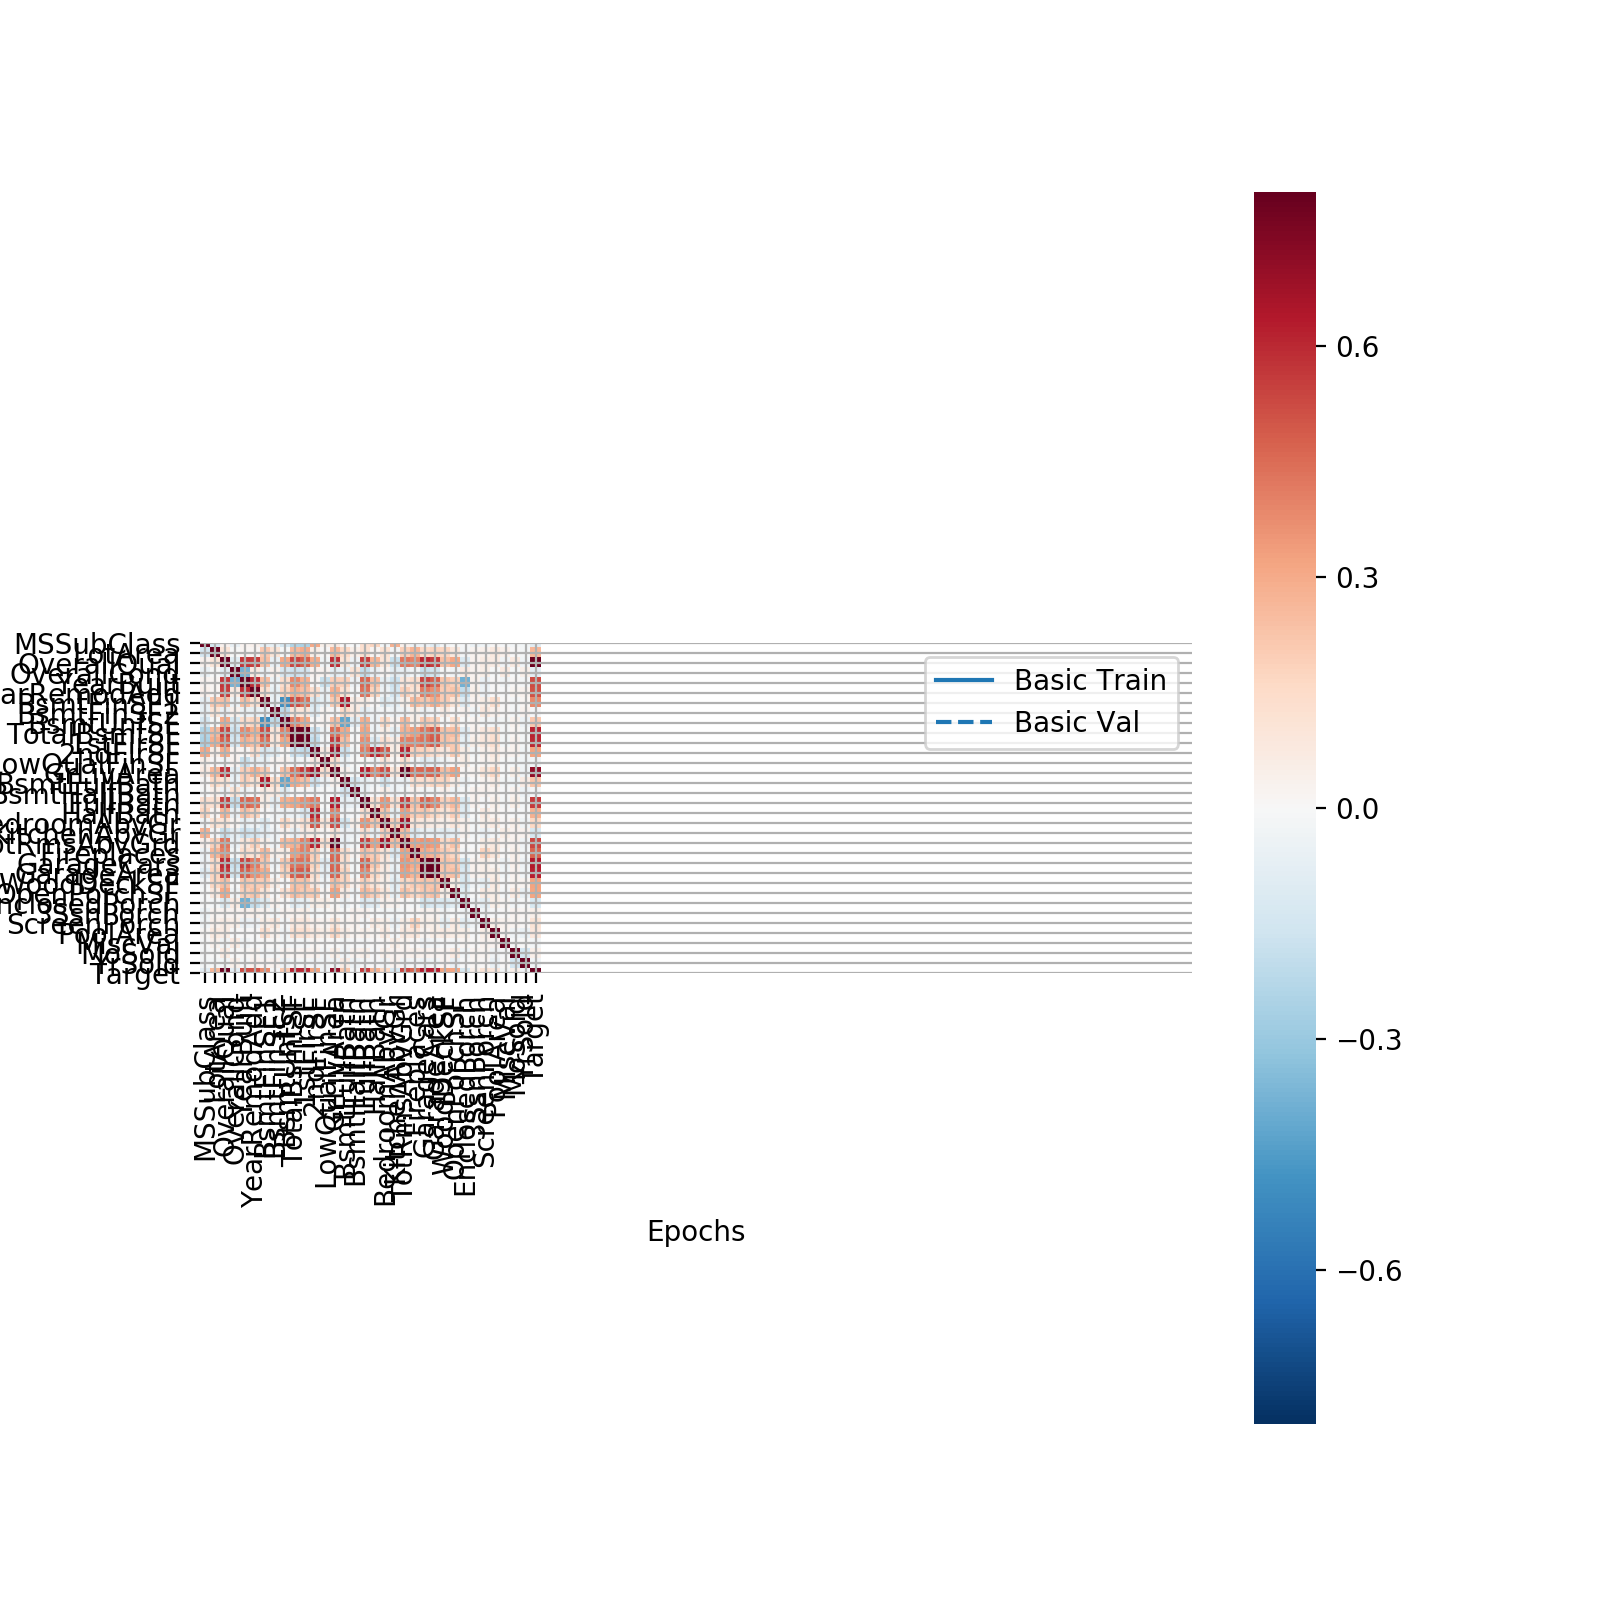

In [5]:
# Compute correlation
correlation_matrix = gt.corr()

# Open figure container
fig = plt.figure(figsize = (8,8))
# Make color heatmap (library seaborn)
sb.heatmap(correlation_matrix, vmax = 0.8, vmin=-0.8, square = True, cmap='RdBu_r')
# Display plot
plt.show()

### One-hot-encoding of categorical variables

In [6]:
# Function for the one-hot encoding
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

# Get index of categorical columns 
cat_cols = gt.select_dtypes(include=['object'])
cat_cols = cat_cols.columns

# Transform data
print('There were {} columns before encoding categorical features'.format(gt.shape[1]))
gt = oneHotEncode(gt, cat_cols)
print('There are {} columns after encoding categorical features'.format(gt.shape[1]))


There were 61 columns before encoding categorical features
There are 216 columns after encoding categorical features


### Split data into train & test

In [7]:
n_train = round(gt.shape[0] * 0.6)
train = gt[:n_train]
test = gt[n_train:]

target = train['Target']
train.drop(['Target'], axis = 1, inplace = True)

truth = test['Target']
test.drop(['Target'], axis = 1, inplace = True)

# 2. Build Neural Network

In [8]:
# Initiate a sequential model (i.e., no recurrence)
NN_model = Sequential()

# Make the first layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# Make hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Make the output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               27648     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 126,721
Trainable params: 126,721
Non-trainable params: 0
_________________________________________________________________


### Checkpoint callback
A backup system that saves the models learned at each epoch.
It saves only the models that are better than the previous models.

A file is made for each new model, containing the weights & biases of each neuron. Any of these files can be loaded to instantiate the corresponding network.

In [9]:
# Define how to name the files
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# Instantiate the checkpoint system
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

### Train the neural network

In [10]:
history = NN_model.fit(train, target, epochs=100, 
             # No. of randomly sampled data points used to compute the errors at each epoch (avoid overfitting)
             batch_size=32, 
             # Size of validation set for cross-validation
             validation_split = 0.2, 
             # Link to checkpoint system, to check teh best model previously built
             callbacks=callbacks_list)

Train on 700 samples, validate on 176 samples
Epoch 1/100
 32/700 [>.............................] - ETA: 5s - loss: 35472637952.0000 - mean_absolute_error: 179352.1875
Epoch 00001: val_loss improved from inf to 31822081861.81818, saving model to Weights-001--31822081861.81818.hdf5
700/700 [==============================] - 0s 618us/sample - loss: 38442537802.6057 - mean_absolute_error: 178503.4531 - val_loss: 31822081861.8182 - val_mean_absolute_error: 162416.6719
Epoch 2/100
 32/700 [>.............................] - ETA: 0s - loss: 49331843072.0000 - mean_absolute_error: 182491.9688
Epoch 00002: val_loss improved from 31822081861.81818 to 7853151837.09091, saving model to Weights-002--7853151837.09091.hdf5
700/700 [==============================] - 0s 125us/sample - loss: 22849001246.7200 - mean_absolute_error: 110857.5625 - val_loss: 7853151837.0909 - val_mean_absolute_error: 57406.5625
Epoch 3/100
 32/700 [>.............................] - ETA: 0s - loss: 5871048704.0000 - mean_ab

608/700 [=========================>....] - ETA: 0s - loss: 1606536116.2105 - mean_absolute_error: 26816.2949
Epoch 00041: val_loss did not improve from 1364200203.63636
700/700 [==============================] - 0s 107us/sample - loss: 1625942312.2286 - mean_absolute_error: 27231.8887 - val_loss: 1389569413.8182 - val_mean_absolute_error: 25308.5801
Epoch 42/100
 32/700 [>.............................] - ETA: 0s - loss: 1664751104.0000 - mean_absolute_error: 28013.9980
Epoch 00042: val_loss improved from 1364200203.63636 to 1349876427.63636, saving model to Weights-042--1349876427.63636.hdf5
700/700 [==============================] - 0s 133us/sample - loss: 1625870667.3371 - mean_absolute_error: 26599.4863 - val_loss: 1349876427.6364 - val_mean_absolute_error: 24838.7051
Epoch 43/100
 32/700 [>.............................] - ETA: 0s - loss: 2370180352.0000 - mean_absolute_error: 35112.0000
Epoch 00043: val_loss did not improve from 1349876427.63636
700/700 [===========================

 32/700 [>.............................] - ETA: 0s - loss: 6491301888.0000 - mean_absolute_error: 40606.3477
Epoch 00063: val_loss did not improve from 1331360640.00000
700/700 [==============================] - 0s 82us/sample - loss: 1571306130.2857 - mean_absolute_error: 26172.8887 - val_loss: 1333826554.1818 - val_mean_absolute_error: 24748.1582
Epoch 64/100
 32/700 [>.............................] - ETA: 0s - loss: 2222128128.0000 - mean_absolute_error: 24900.9492
Epoch 00064: val_loss improved from 1331360640.00000 to 1316913163.63636, saving model to Weights-064--1316913163.63636.hdf5
700/700 [==============================] - 0s 128us/sample - loss: 1574523267.6571 - mean_absolute_error: 26059.7637 - val_loss: 1316913163.6364 - val_mean_absolute_error: 24713.3516
Epoch 65/100
 32/700 [>.............................] - ETA: 0s - loss: 1102179328.0000 - mean_absolute_error: 23871.4727
Epoch 00065: val_loss did not improve from 1316913163.63636
700/700 [============================

### Inspect errors, epoch after epoch

In [11]:
# Retrieve the hitory of every epoch's training
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  mean_absolute_error      val_loss  val_mean_absolute_error  \
95  1.461661e+09         25051.431641  1.312171e+09             24675.289062   
96  1.536749e+09         26085.853516  1.356326e+09             25519.607422   
97  1.491566e+09         25233.656250  1.402628e+09             25898.054688   
98  1.482349e+09         25377.494141  1.318064e+09             24637.498047   
99  1.529475e+09         25373.476562  1.300698e+09             24431.054688   

    epoch  
95     95  
96     96  
97     97  
98     98  
99     99

<IPython.core.display.Javascript object>


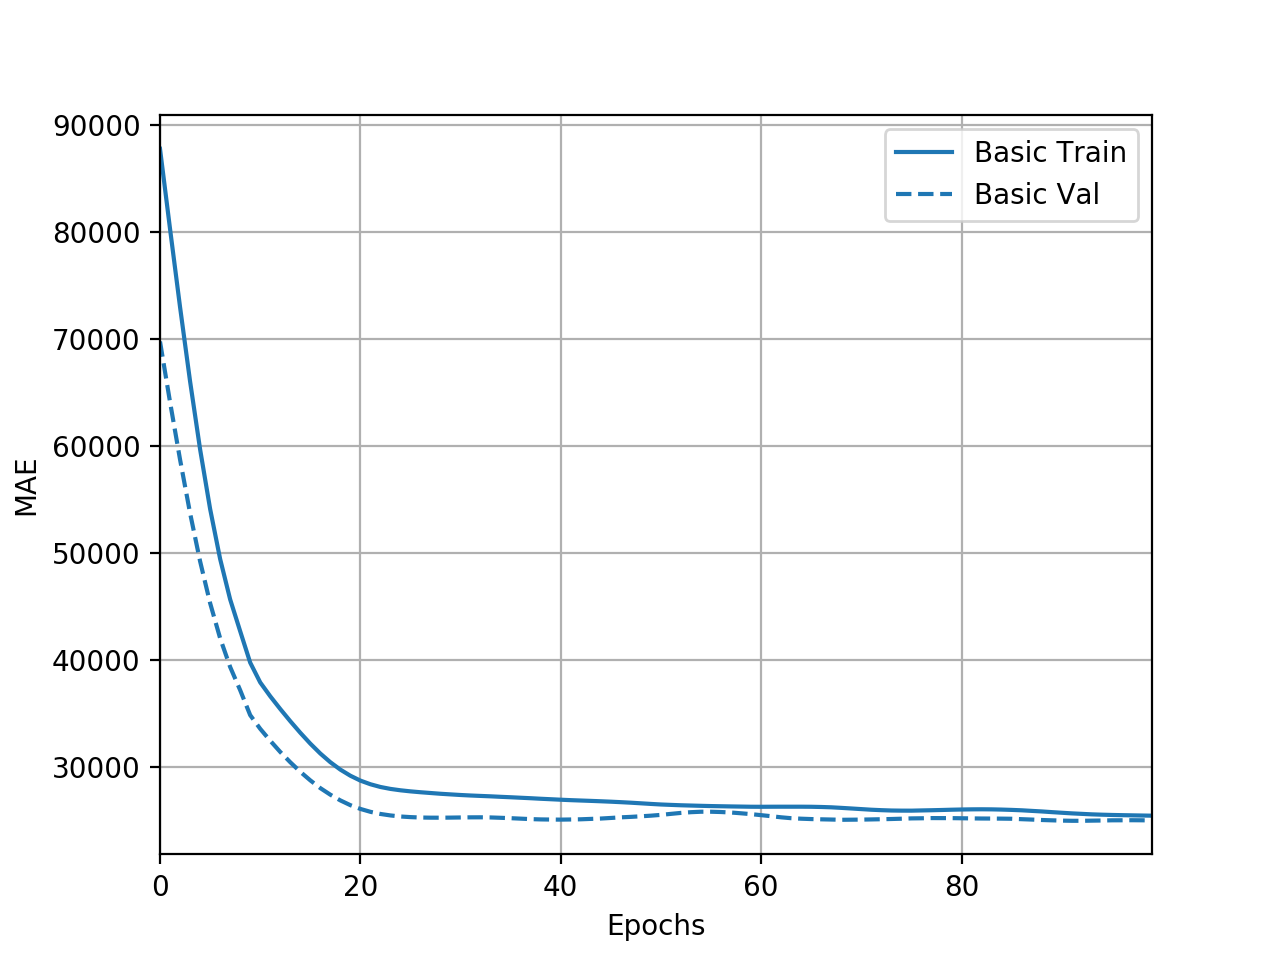

In [13]:
# Plot the evolution of errors epoch after epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylabel('MAE')
plt.show()

# 3. Test the Neural Network
First we instantiate the model using the bext parameters from the training phase.

In [14]:
#!# Check best checkpoint in your local folder (the last file saved)
#   Paste the name of the last file saved by tech checkpoint system
weights_file = 'Weights-100--1266909282.90909.hdf5' 

# Load teh parameters of teh models (weights & bias)
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [15]:
prediction = NN_model.predict(test)

<IPython.core.display.Javascript object>


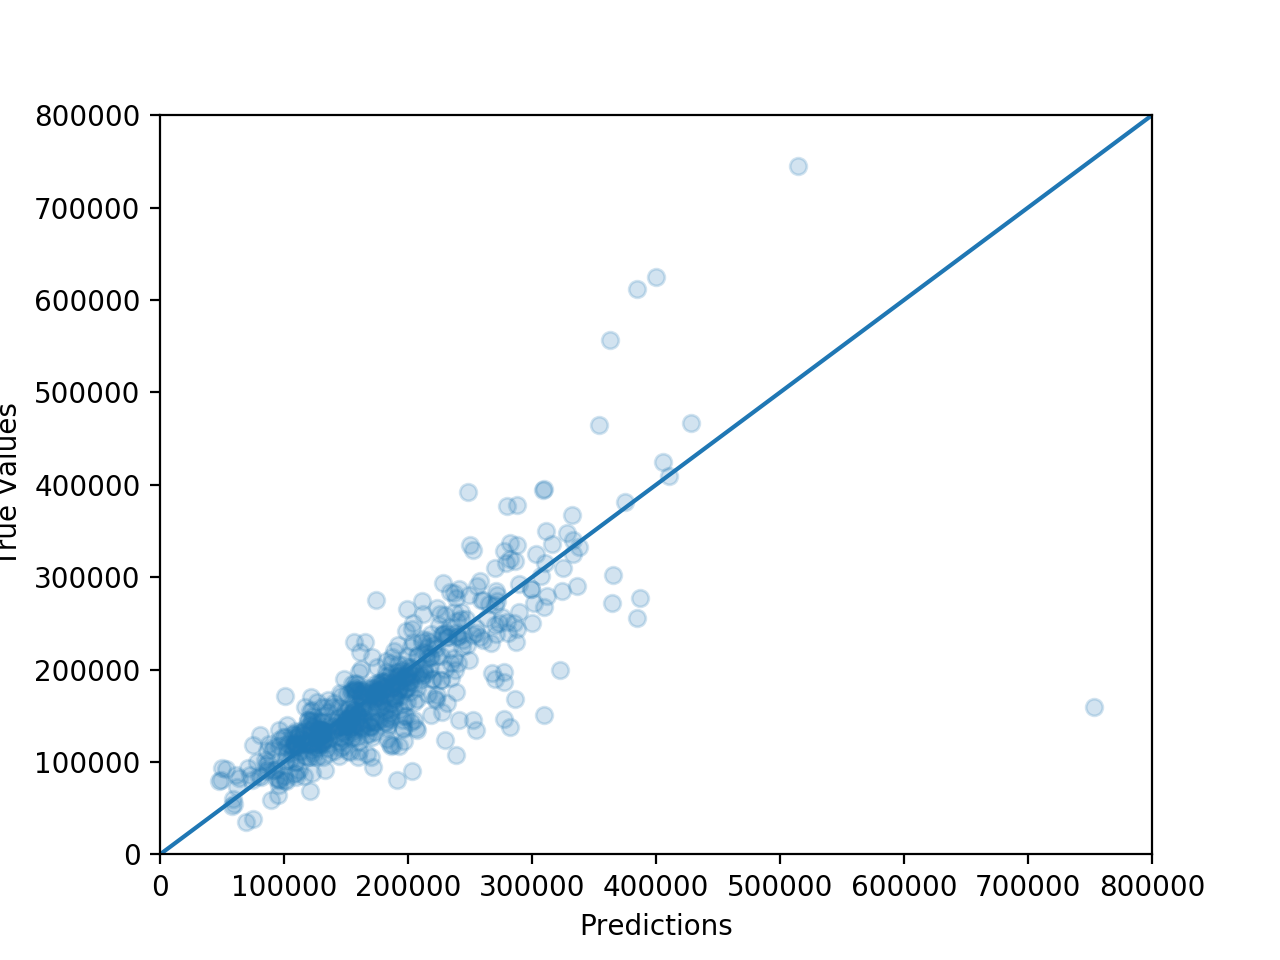

In [16]:
plt.figure()
plt.scatter(prediction, truth, alpha=0.2)
plt.xlabel('Predictions')
plt.ylabel('True Values')
lims = [0, 800000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

<IPython.core.display.Javascript object>


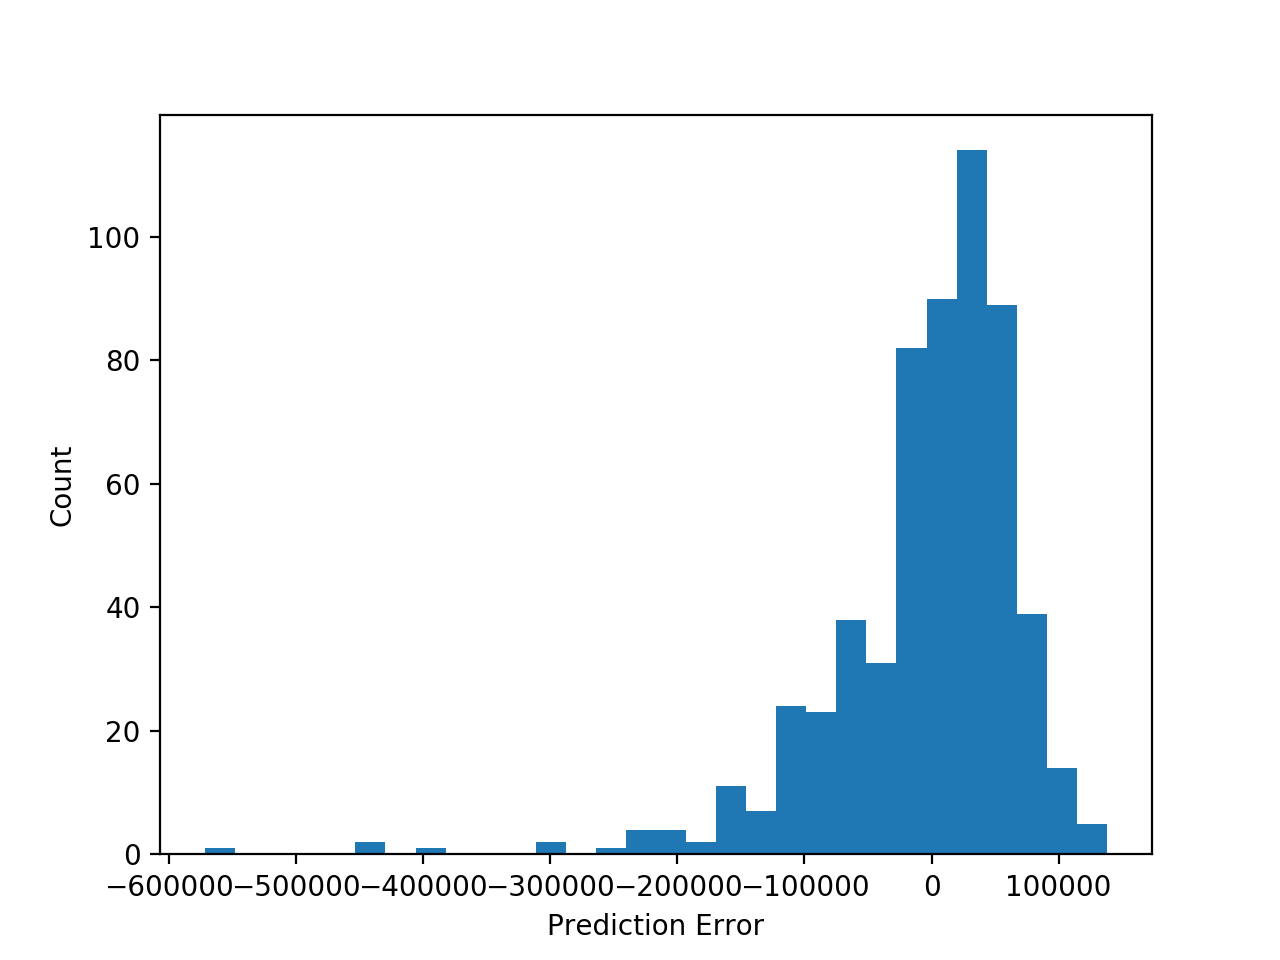

In [17]:
error = prediction - truth.to_numpy()
plt.figure()
plt.hist(error[0], bins = 30)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()